# Overfitting Demo

# Generate Random Data
We are going to randomly create some points and add in a little bit of noise.

In [179]:
import numpy as np
n = 30
min_val = -5.0
max_val = 5.0
range_val = max_val - min_val

#This will generate an array of values from min to max
x_data = min_val + range_val * np.random.rand(n, 1) 

# Use a quadratic formula to compute each of the y values plus a bit of noise
y_data = -3 + 2*x_data +x_data**2 + 4*np.random.rand(n, 1)

# The following will do a log function
#y_data = 3 + np.log(x_data - min_val) + 0.2*np.random.rand(n, 1) 

# The following will do a sin function
#y_data = 2 + np.sin(x_data) + 0.2*np.random.rand(n, 1) 

# The following will do an exponential function
#y_data = 2 + np.exp(x_data) + 0.2*np.random.rand(n, 1) 

# The following will do an absolute value function
#y_data = -2 + np.abs(x_data) + 0.3*np.random.rand(n, 1)

# The following will do a line with a modest bit of noise
#y_data = -2 + 3* x_data + 1.5*np.random.rand(n, 1)


    
print(x_data)
print(y_data)

[[-3.71975605]
 [-0.97904491]
 [-1.32470131]
 [-4.39785048]
 [-1.92617054]
 [-2.77042042]
 [ 4.88894778]
 [ 4.21608027]
 [-3.18392598]
 [-3.02278425]
 [-1.72938132]
 [-0.96520681]
 [-2.4010594 ]
 [-4.01492807]
 [ 2.68311584]
 [-2.03721497]
 [-2.54518471]
 [ 0.92490418]
 [-3.95851839]
 [ 0.90853027]
 [ 0.49351274]
 [ 0.85562774]
 [-3.84266096]
 [ 1.18118314]
 [ 4.79895172]
 [ 3.3594661 ]
 [ 3.06960176]
 [-0.61584301]
 [ 4.93606122]
 [ 1.02045373]]
[[2.6506811 ]
 [1.23370687]
 [1.05939767]
 [2.96827654]
 [1.23235758]
 [1.73802819]
 [1.17575243]
 [1.25119775]
 [2.06620704]
 [2.06185134]
 [1.12601792]
 [1.22171741]
 [1.39152065]
 [2.95547689]
 [2.56333394]
 [1.19650782]
 [1.4485588 ]
 [2.83833786]
 [2.84098631]
 [2.86741672]
 [2.59290824]
 [2.88289533]
 [2.78399421]
 [3.06709642]
 [1.09956568]
 [1.92007426]
 [2.23277746]
 [1.61322608]
 [1.15154379]
 [2.97636752]]


## Quick Look at the Data
We will use pyplot from matplotlib

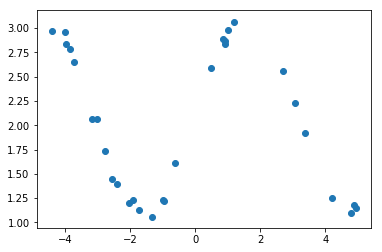

In [180]:
import matplotlib.pyplot as plt
plt.scatter(x_data, y_data)
plt.show()

## Try fitting a Line (Linear Regression)

In [181]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_data, y_data)

intercept = linear_model.intercept_[0]
slope = linear_model.coef_[0][0]
print(intercept, slope)

1.9871253719315793 -0.058824124697006375


## Plot the line and the data

0.1


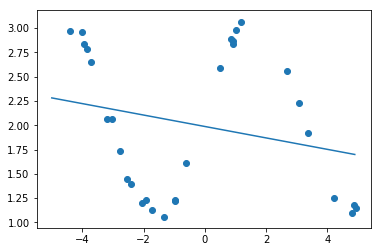

In [182]:
# Will use a list comprehension to create the curve points
number_points = 100
delta = (max_val - min_val)/number_points
print(delta)
x_curve = [ i*delta + min_val for i in range(number_points) ]
y_curve = [ intercept + slope*x for x in x_curve]

plt.scatter(x_data, y_data)
plt.plot(x_curve, y_curve)
plt.show()


## Try fitting with a quadratic

In [183]:
from sklearn.preprocessing import PolynomialFeatures
create_poly_terms = PolynomialFeatures(degree=2, include_bias=False)
x_poly_terms = create_poly_terms.fit_transform(x_data)

quad_model = LinearRegression()
quad_model.fit(x_poly_terms, y_data)

intercept = quad_model.intercept_[0]
coefs = quad_model.coef_[0]
print(intercept, coefs)

2.037699040130891 [-0.05553492 -0.00579971]


0.1


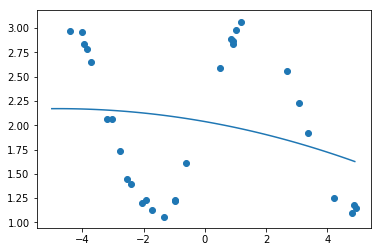

In [184]:
number_points = 100
delta = (max_val - min_val)/number_points
print(delta)
x_curve = [ i*delta + min_val for i in range(number_points) ]
y_curve = [ intercept + coefs[0]*x + coefs[1]*x**2 for x in x_curve]

plt.scatter(x_data, y_data)
plt.plot(x_curve, y_curve)
plt.show()

## Try Fitting with a degree K polynomial

In [191]:
K = 25

create_poly_terms = PolynomialFeatures(degree=K, include_bias=False)
x_poly_terms = create_poly_terms.fit_transform(x_data)

poly_model = LinearRegression()
poly_model.fit(x_poly_terms, y_data)

intercept = poly_model.intercept_[0]
coefs = poly_model.coef_[0]
print(intercept, coefs)

2.2266196100790925 [ 1.55339365e-04 -4.56808258e-04  4.35107242e-04 -5.78438563e-04
  1.16293549e-03 -1.50357865e-03  2.74879318e-03 -2.77446607e-03
  4.83625157e-03 -2.20026422e-03  4.06291575e-03  3.08887350e-03
 -3.14896323e-03 -1.10196811e-03  7.91711101e-04  1.88663430e-04
 -1.02952055e-04 -1.78098198e-05  7.75399797e-06  9.48961878e-07
 -3.43063393e-07 -2.67694002e-08  8.32012750e-09  3.11115314e-10
 -8.57257177e-11]


0.01


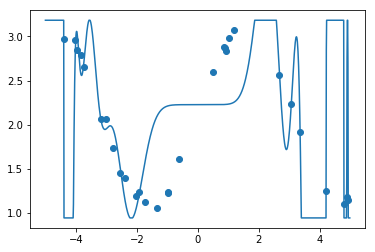

In [192]:
def poly_eval(intercept, coefs, x, y_min, y_max):
    value = intercept
    x_power = x
    for coef in coefs:
        term = coef * x_power
        x_power *= x
        value += term
    # Clip values 
    if value < y_min: return y_min
    if value > y_max: return y_max
    return value

plt.scatter(x_data, y_data)
# Get the bounds from the scatter data
[y_min, y_max] = plt.gca().get_ylim()


number_points = 1000
delta = (max_val - min_val)/number_points
print(delta)
x_curve = [ i*delta + min_val for i in range(number_points) ]
y_curve = [ poly_eval(intercept, coefs, x, y_min, y_max) for x in x_curve]


plt.plot(x_curve, y_curve)


plt.show()

## _Notes_
If the max degree of the polynomial is K, then the number of paramters is K+1.  As the number of random data points gets closer and closer to K, the polynomial does a better job of fitting the data by virtue of going through all the points.  Unfortunately, this also causes the function to have wild swings.  This is clearly not a good fit for the data.